<img src="../imgs/CV_intro.png" style="width:1700px;">

# <center> 09. Computer vision: computing image features! </center>

## <span style="color:red"> Outline </span> 
1. **Introduction to Images**
2. **Computing features: gradients**
3. **Convolution on Images**

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.signal import convolve2d
%matplotlib inline

## <span style="color:red"> 1. Introduction to Images </span> 
### Images are matrices!

Images are matrices and each value is named **PIXEL**, which represents the luminosity at each point. 

- An image with size  $m\times n$ pixels in gray scale is represented as a matrix with size `(m,n)`.
- An image with size $m \times n$ pixels in color is represented as a matrix with size `(m,n,3)`. 
- In color, the image is codified in three chanels **RGB**.
- Each pixel value can take a value between `0` (black) and `255` (white). In middle there exist gray scalar values. 

In this course, we will use the library  [`skimage`](http://scikit-image.org/) to read and manipulate images or sequence of images. 

#### Let's GO!

dimensiones (570, 1014, 3) max 255 min 0
pixel at blue marker  [203 213 223]
pixel at green marker [215  19  65]


numpy.ndarray

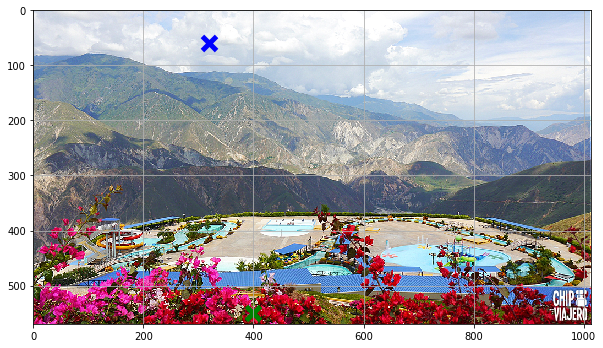

In [2]:
img = io.imread("../imgs/chicamocha.jpg")


print "dimensiones", img.shape, "max", np.max(img), "min", np.min(img)
plt.figure(figsize=(10,7))
plt.scatter(320,60, marker="x", s=200, linewidth=5, c="b")
plt.scatter(400,550, marker="x", s=200, linewidth=5, c="g")
print "pixel at blue marker ", img[60,320,:]
print "pixel at green marker", img[550,400,:]

plt.grid() # remove gridlines
plt.imshow(img)
type(img)

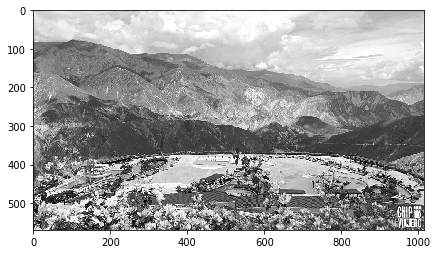

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(img[:,:,0], cmap = plt.cm.gray)

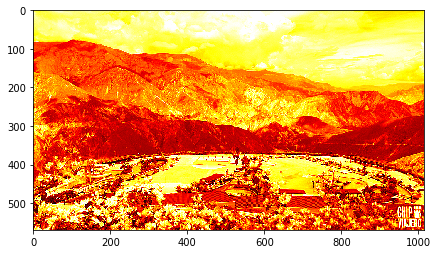

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(img[:,:,0], cmap = plt.cm.hot) #plt.cm.Greys_r

## Image processing

Image processing is the computation of any matricial method over luminosity values of each pixel. For instance, we can obtain a gray-scale version of the image by computing the "mean" over the chanels of each pixel. 

The most natural way is with the function  `np.mean` and the proper argument for `axis`

dimensiones (570, 1014, 3) max 255 min 0
pixel at blue marker  213.0
pixel at green marker 88.0


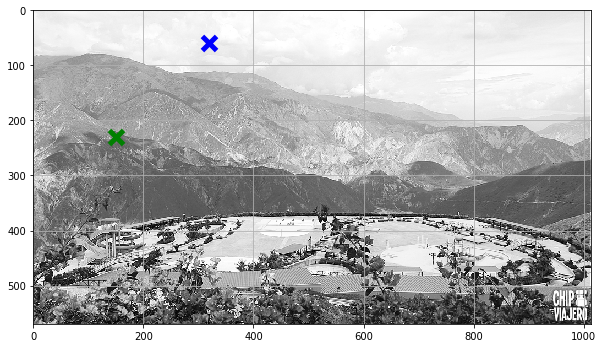

In [6]:
gimg = np.mean(img, axis=2)
print "dimensiones", img.shape, "max", np.max(img), "min", np.min(img)
plt.figure(figsize=(10,7))
plt.scatter(320,60, marker="x", s=200, linewidth=5, c="b")
plt.scatter(150,230, marker="x", s=200, linewidth=5, c="g")
print "pixel at blue marker ", gimg[60,320]
print "pixel at green marker", gimg[230,150]
plt.grid() # remove gridlines
plt.imshow(gimg, cmap = plt.cm.Greys_r, vmin=0, vmax=255)

## <span style="color:orange">student</span>: 

A simple average of chanels is the real grayscale image ? 
    - Try to find other way to compute grayscale images and compare ...

## <span style="color:red"> R:/ </span>: 


dimensions (570, 1014, 3) max 255.0 min 0.0
pixel at blue marker  211.596
pixel at green marker 81.0284


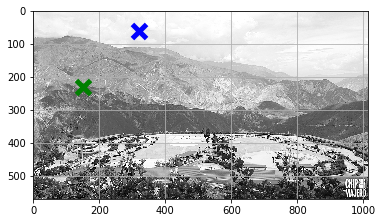

In [7]:
from skimage.color import rgb2gray
from skimage import data


gray_image = rgb2gray(img)*255

print "dimensions", img.shape, "max", np.max(gray_image), "min", np.min(gray_image)
plt.scatter(320,60, marker="x", s=200, linewidth=5, c="b")
plt.scatter(150,230, marker="x", s=200, linewidth=5, c="g")
print "pixel at blue marker ", gray_image[60,320]
print "pixel at green marker", gray_image[230,150]
plt.grid() # remove gridlines
plt.imshow(gray_image, cmap = plt.cm.Greys_r, vmin=0, vmax=255)

## <span style="color:red"> 2. Computing features: gradients </span> 
### Gradients exploit geometrical image structure

We namely dont need color information. The geometrical information can be simply obtained from grayscale images. The gradient of iamges are: 

$$\hat{I}(x, y) = \frac{\partial I(x, y)}{\partial x,  \partial y}$$

So, change to grayscale images.

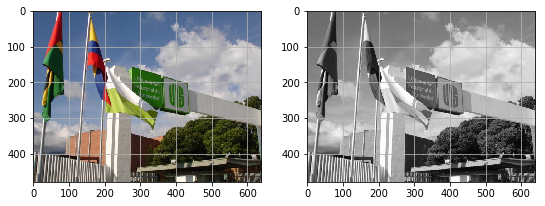

In [8]:
img_uis = io.imread("../imgs/uis4.jpg")
uis_gimg = rgb2gray(img_uis)*255# np.mean(img, axis=2)

fig = plt.figure(figsize=(9,9))
fig.add_subplot(121); plt.grid(); 
plt.imshow(img_uis);
fig.add_subplot(122); plt.grid()
plt.imshow(uis_gimg, cmap = plt.cm.Greys_r);

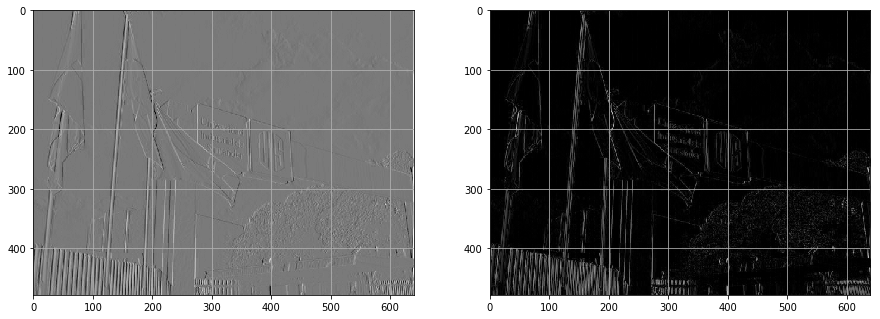

In [9]:
fig = plt.figure(figsize=(9,9))
rimg = np.copy(uis_gimg)
rimg[:,:-1]-=rimg[:,1:] #[todas las filas, todas las columnas. ]
fig = plt.figure(figsize=(15,10))
fig.add_subplot(121)
plt.imshow(rimg, cmap = plt.cm.Greys_r); plt.grid()
fig.add_subplot(122)
plt.imshow(np.abs(rimg), cmap = plt.cm.Greys_r); plt.grid();

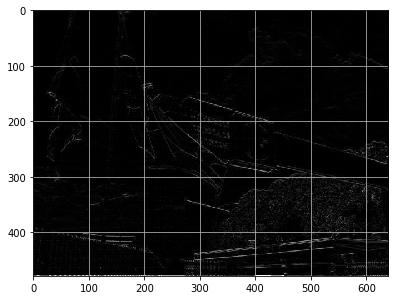

In [10]:
rimg = np.copy(uis_gimg)
rimg[:-1,:]-=rimg[1:,:]
fig = plt.figure(figsize=(14,14))
fig.add_subplot(121)
plt.imshow(np.abs(rimg), cmap = plt.cm.Greys_r); plt.grid()

## <span style="color:red"> 3. Convolution on images </span> 

#### Local image manipulation!

A common approach in image application is only process or take into account patches of images, for instance in face recognition.

In Python, we can acess to pathces using a natural matricial notation. As you can see..

## <span style="color:orange">student</span>: 

**What happened when image luminosity is reduced by half?**

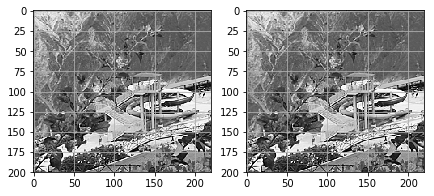

In [10]:
parche = gray_image[300:500, 0:220]
parche_oscuro = parche/2

fig = plt.figure(figsize=(7,7))
fig.add_subplot(121); plt.grid(); 
plt.imshow(parche, cmap=plt.cm.Greys_r, vmin=0, vmax=255)
fig.add_subplot(122); plt.grid(); 
plt.imshow(parche_oscuro, cmap=plt.cm.Greys_r);

## <span style="color:orange">student</span>: 

**Which is the difference with differen version of grayscale images?**
**Why images below looks close similar? **

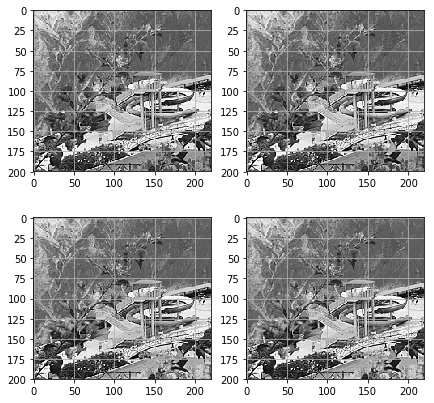

In [11]:

parche_gr = gimg[300:500, 0:220]
parche_oscuro_gr = parche_gr/2

fig = plt.figure(figsize=(7,7))
fig.add_subplot(221); plt.grid(); 
plt.imshow(parche, cmap=plt.cm.Greys_r, vmin=0, vmax=255);
fig.add_subplot(222); plt.grid(); 
plt.imshow(parche_oscuro, cmap=plt.cm.Greys_r);
fig.add_subplot(223); plt.grid(); 
plt.imshow(parche_gr, cmap=plt.cm.Greys_r);
fig.add_subplot(224); plt.grid(); 
plt.imshow(parche_oscuro_gr, cmap=plt.cm.Greys_r);

In [12]:
np.max(parche_oscuro), np.max(parche)

(127.5, 255.0)


### Fundamentals on convolution 
The convolution is a **fundamental** operation in image processing to compute **visual features**. The convolution operation is illustrated in Figure. For instance, a **KERNEL** mask with size $3 \times 3$ is sliding around the image. At each position, each corresponding pixel is multiplied by corresponding value in **kernel**  and finally the values are sum up  to obtain a new estimated value. 


The general expression in discrete signals for convolution is: 

$$y(n) = \sum_{K=-\infty}^{\infty} x(k)h(n-k)$$, 
$$y(n) = x(k)*h(n)$$

, so, for images (signals in 2D), the convolution operation could be defined as: 

$$I(x,y) = \sum_{u=0}^{n} \sum_{v=0}^{m} I(x,y)h(u-x, v-y)$$, 
$$\hat{I}(x,y) = I(x,y)*h(x,y)$$

<img src="../imgs/FM_conv2.png">


<img src="../imgs/Convolution_schematic.gif">

<small>Image source: Tutorial _Unsupervised Feature Learning Learning Deep Learning_ de Stanford (<a href="http://deeplearning.stanford.edu/tutorial/">sitio web</a>).</small>


Depending of mask value, we can obtain different efects and properties for images **(_features_) **


## Convolution example:  Computing geometrical features

Convolution with edges using the function: `convolve2d`

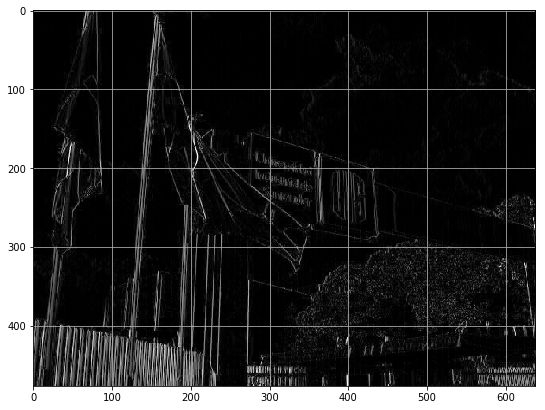

In [13]:
fig = plt.figure(figsize=(9,9))
f = np.array([[0,0,0],[0,-1,1],[0,0,0]])
c = convolve2d(uis_gimg, f, mode="valid")
plt.imshow(np.abs(c), cmap = plt.cm.Greys_r); plt.grid()

horizontal edges with both methods

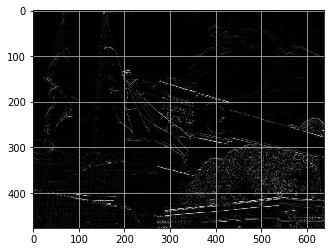

In [14]:
f = np.array([[0,0,0],[0,-1,0],[0,1,0]])
c = convolve2d(uis_gimg, f, mode="valid")
fig.add_subplot(122)
plt.imshow(np.abs(c), cmap = plt.cm.Greys_r); plt.grid();

using both borders information

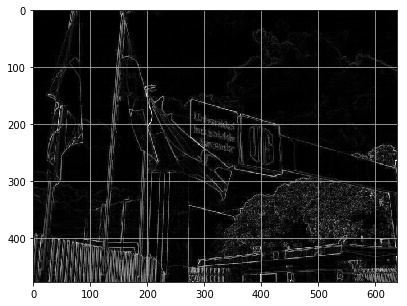

In [15]:
fig = plt.figure(figsize=(9,9))
fv = np.array([[0,0,0],[0,-1,1],[0,0,0]])
fh = np.array([[0,0,0],[0,-1,0],[0,1,0]])
cv = convolve2d(uis_gimg, fv, mode="valid")
ch = convolve2d(uis_gimg, fh, mode="valid")

#b= np.sqrt(cv**2 + ch**2)
b = (np.abs(cv) + np.abs(ch) ) / 2
plt.figure(figsize=(10,5))
plt.imshow(b, cmap = plt.cm.Greys_r); plt.grid();

(-10, 300)

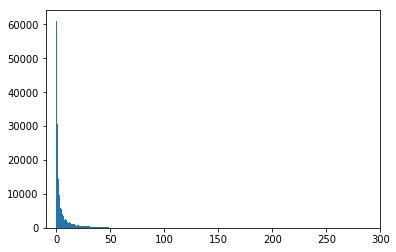

In [16]:
plt.hist(b.reshape(b.shape[0]*b.shape[1]), bins=255);
plt.xlim([-10,300])

Discretizamos los bordes

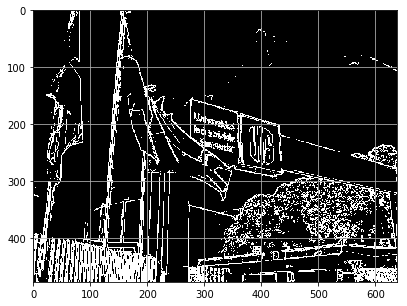

In [17]:
b = np.sqrt(cv**2 + ch**2)
threshold = 20
b[b>threshold]=255
b[b<threshold]=0
plt.figure(figsize=(10,5))
plt.imshow(b, cmap = plt.cm.Greys_r); plt.grid()

(-10, 300)

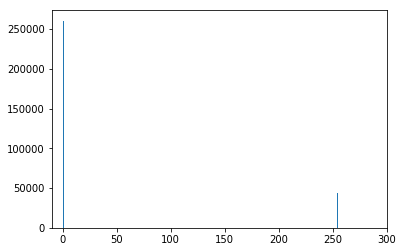

In [18]:
plt.hist(b.reshape(b.shape[0]*b.shape[1]), bins=255);
plt.xlim([-10,300])

## <span style="color:red"> R:/ </span>: 

**What about if we apply the next kernel??**


     f_XX = np.array([[ 0, 0, 0],

                 [ 0, 1, 0],
                 
                 [ 0, 0, 0]]) 

Otros filtros

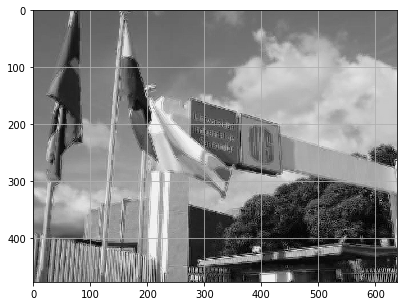

In [35]:
f_sharpen = np.array([[ 1, 1, 1],
                      [ 1, -5, 1],
                      [ 1, 1, 1]])

f_emboss  = np.array([[ -1, -1, 0],
                      [ -1, 0, 1],
                      [ 0, 1, 1]])

f_blur = np.array([[ 1, 1, 1],
              [ 1, 1, 1],
              [ 1, 1, 1]])

f_motionblur = np.array([[-1,-1,-1,-1,-1],
                         [-1, 2, 2, 2,-1],
                         [-1, 2, 8, 2,-1],
                         [-1, 2, 2, 2,-1],
                         [-1,-1,-1,-1,-1]])

f_bigblur = np.ones((10,10))

f_any  = np.array([[ -50, 5],
                   [ -50, 5],
                   [ 10, 10]])

c = convolve2d(uis_gimg, f_sharpen, mode="valid")
c = np.abs(c)
plt.figure(figsize=(10,5))
plt.imshow(c, cmap = plt.cm.Greys_r); plt.grid()

## Some predefined Kernels:
### Prewitt and Sobel 

For instance, some kernels to compute more accurate derivates: 
- prewitt

    [ 1, 1, 1],
   
    [ 0, 0, 0],

    [ -1, -1, -1]

- Sobel 

    [ 1, 2, 1],
   
    [ 0, 0, 0],

    [ -1, -2, -1]
    
Analyze such operations in images      


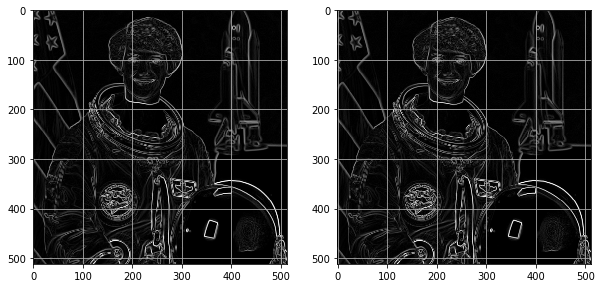

In [26]:
from skimage.data import camera
from skimage import color, data, restoration
from skimage.filters import roberts, sobel, scharr, prewitt


image = color.rgb2gray(data.astronaut()) #camera()
edge_prewitt = prewitt(image)
edge_sobel = sobel(image)

fig = plt.figure(figsize=(10,12))
fig.add_subplot(121)
plt.imshow(edge_prewitt, cmap = plt.cm.Greys_r); plt.grid()
fig.add_subplot(122)
plt.imshow(edge_sobel, cmap = plt.cm.Greys_r); plt.grid()

###  ** Convolution as Mean Filter ** 
 
        [[1/9 1/9 1/9]
         [1/9 1/9 1/9]
         [1/9 1/9 1/9] ]
 



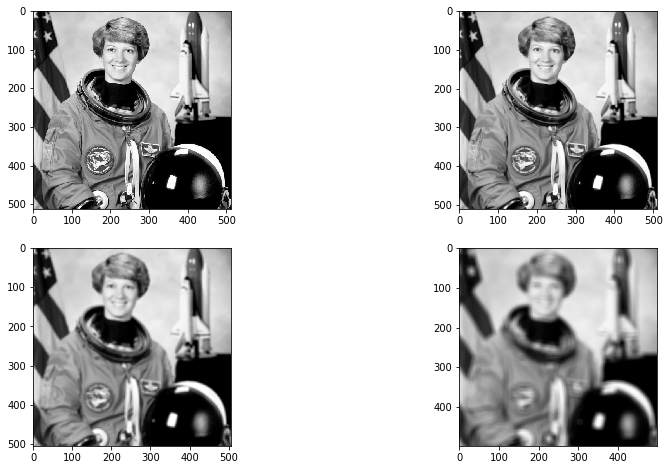

In [30]:
image = color.rgb2gray(data.astronaut()) #camera()
fig = plt.figure(figsize=(14,8))
fig.add_subplot(2, 2, 1)

plt.imshow(image, cmap = plt.cm.Greys_r);

f_mean_3 = np.array([[ 1, 1, 1],
                     [ 1, 1, 1],
                     [ 1, 1, 1]])

f_mean_3 = f_mean_3/9.
c_3 = convolve2d(image, f_mean_3, mode="valid")
fig.add_subplot(2, 2, 2)
plt.imshow(c_3, cmap = plt.cm.Greys_r);


f_mean_7 = np.array([[ 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1], 
                     [ 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1]])

f_mean_7 = f_mean_7/64.
c_7 = convolve2d(image, f_mean_7, mode="valid")
fig.add_subplot(2, 2, 3)
plt.imshow(c_7, cmap = plt.cm.Greys_r)


f_mean_15 = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

f_mean_15 = f_mean_15/225.
c_15 = convolve2d(image, f_mean_15, mode="valid")
fig.add_subplot(2, 2, 4)
plt.imshow(c_15, cmap = plt.cm.Greys_r)

### Convolution as Gaussian Filter **
$$h(x,y) = \frac{1}{2\pi\sigma^{2}} e^{-\frac{x^{2} + y^{2}}{2 \sigma^{2}}}$$

Suavizado siguiendo una distribución Gaussiana, "se pondera el valor del pixel (centro del vecindario)"

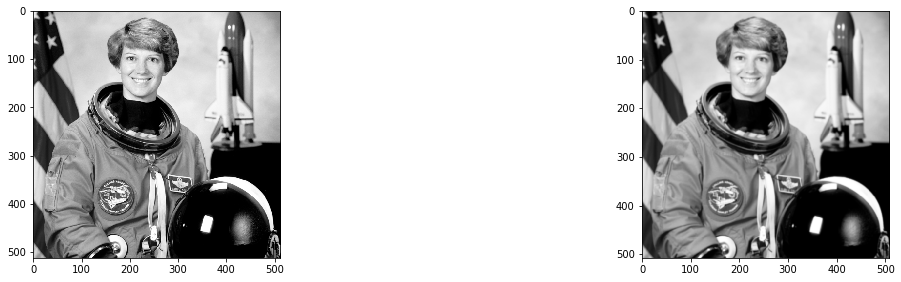

In [31]:
image = color.rgb2gray(data.astronaut()) #camera()
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2, 2, 1)

plt.imshow(image, cmap = plt.cm.Greys_r);


f_gauss_5 = np.array([[ 0, 1, 2, 1, 0],
                      [ 1, 3, 5, 3, 1],
                      [ 2, 5, 9, 5, 2], 
                      [ 1, 3, 5, 3, 1],
                      [ 0, 1, 2, 1, 0]])

f_gauss_5 = f_gauss_5/25.
c_gauss = convolve2d(image, f_gauss_5, mode="valid")
fig.add_subplot(2, 2, 2)
plt.imshow(abs(c_gauss), cmap = plt.cm.Greys_r)



## <span style="color:orange">student</span>: 

**Which represent the next function kernel??**


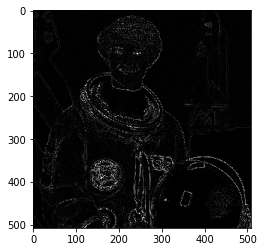

In [32]:
f_gauss_5 = np.array([[  0,  0, -1,  0,  0],
                      [  0, -1, -2, -1,  0],
                      [ -1, -2, 16, -2, -1], 
                      [  0, -1, -2, -1,  0],
                      [  0,  0, -1,  0,  0]])

f_gauss_5 = f_gauss_5/25.
c_gauss = convolve2d(image, f_gauss_5, mode="valid")
plt.imshow(abs(c_gauss), cmap = plt.cm.Greys_r)

# References

[1] Computer vision course (under construction): https://github.com/famarcar/cv-2018-2


[2] SCIKIT-IMAGE library: https://scikit-image.org/

---
# <center> Thanks! </center>